In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
head_list = ["nTracks","nShowers","nVertex","trkE","EmE","pidaLong","pidaShort","lenLong","lenShort","visE","pLong","trackEfrac","nFlashes","flashPE","sig"]
atmo = pd.read_csv("atmotree.csv",names=head_list,header=None,index_col=False)
pdk = pd.read_csv("pdktree.csv",names=head_list,header=None,index_col=False)

# Signal and background csvs are imported, as well as necessary libraries. Look to see they have expected behavior.

In [3]:
atmo.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,4,3,8,0,0,2.80234,0.00000,32.28260,0.00000,0,0.181436,0.000000,2,4324.7500,0
1,2,0,3,0,0,7.25686,3.42414,22.88710,3.26208,0,0.155040,0.638613,2,65.1302,0
2,2,0,3,0,0,16.05470,24.33140,9.66974,2.66706,0,0.109716,0.365521,2,83.0714,0
3,2,0,3,0,0,9.95274,16.83320,27.91820,18.74930,0,0.169489,0.887705,2,78.9774,0
4,4,0,5,0,0,4.32084,3.04405,91.82640,5.22213,0,0.321967,0.000000,2,2062.8600,0


In [4]:
pdk.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,2,0,3,0,0,6.58654,5.87317,48.6192,15.53310,0,0.222760,0.657262,2,1333.5800,1
1,2,0,3,0,0,8.64484,4.02827,51.2072,7.49073,0,0.228995,0.709013,2,564.0920,1
2,3,0,4,0,0,5.81910,39.44040,14.6574,3.74200,0,0.128947,0.298063,1,284.0100,1
3,2,0,3,0,0,10.86520,11.28500,34.3021,22.75140,0,0.186802,0.799846,3,92.4554,1
4,2,0,3,0,0,9.38759,9.70459,50.4080,12.87600,0,0.227076,0.868688,1,56.5050,1


In [5]:
pdk_df = atmo
pdk_df=pdk_df.append(pdk,ignore_index=True)
pdk_df=pdk_df.drop(["trkE","EmE","visE"],axis=1)

In [6]:
import seaborn as sb

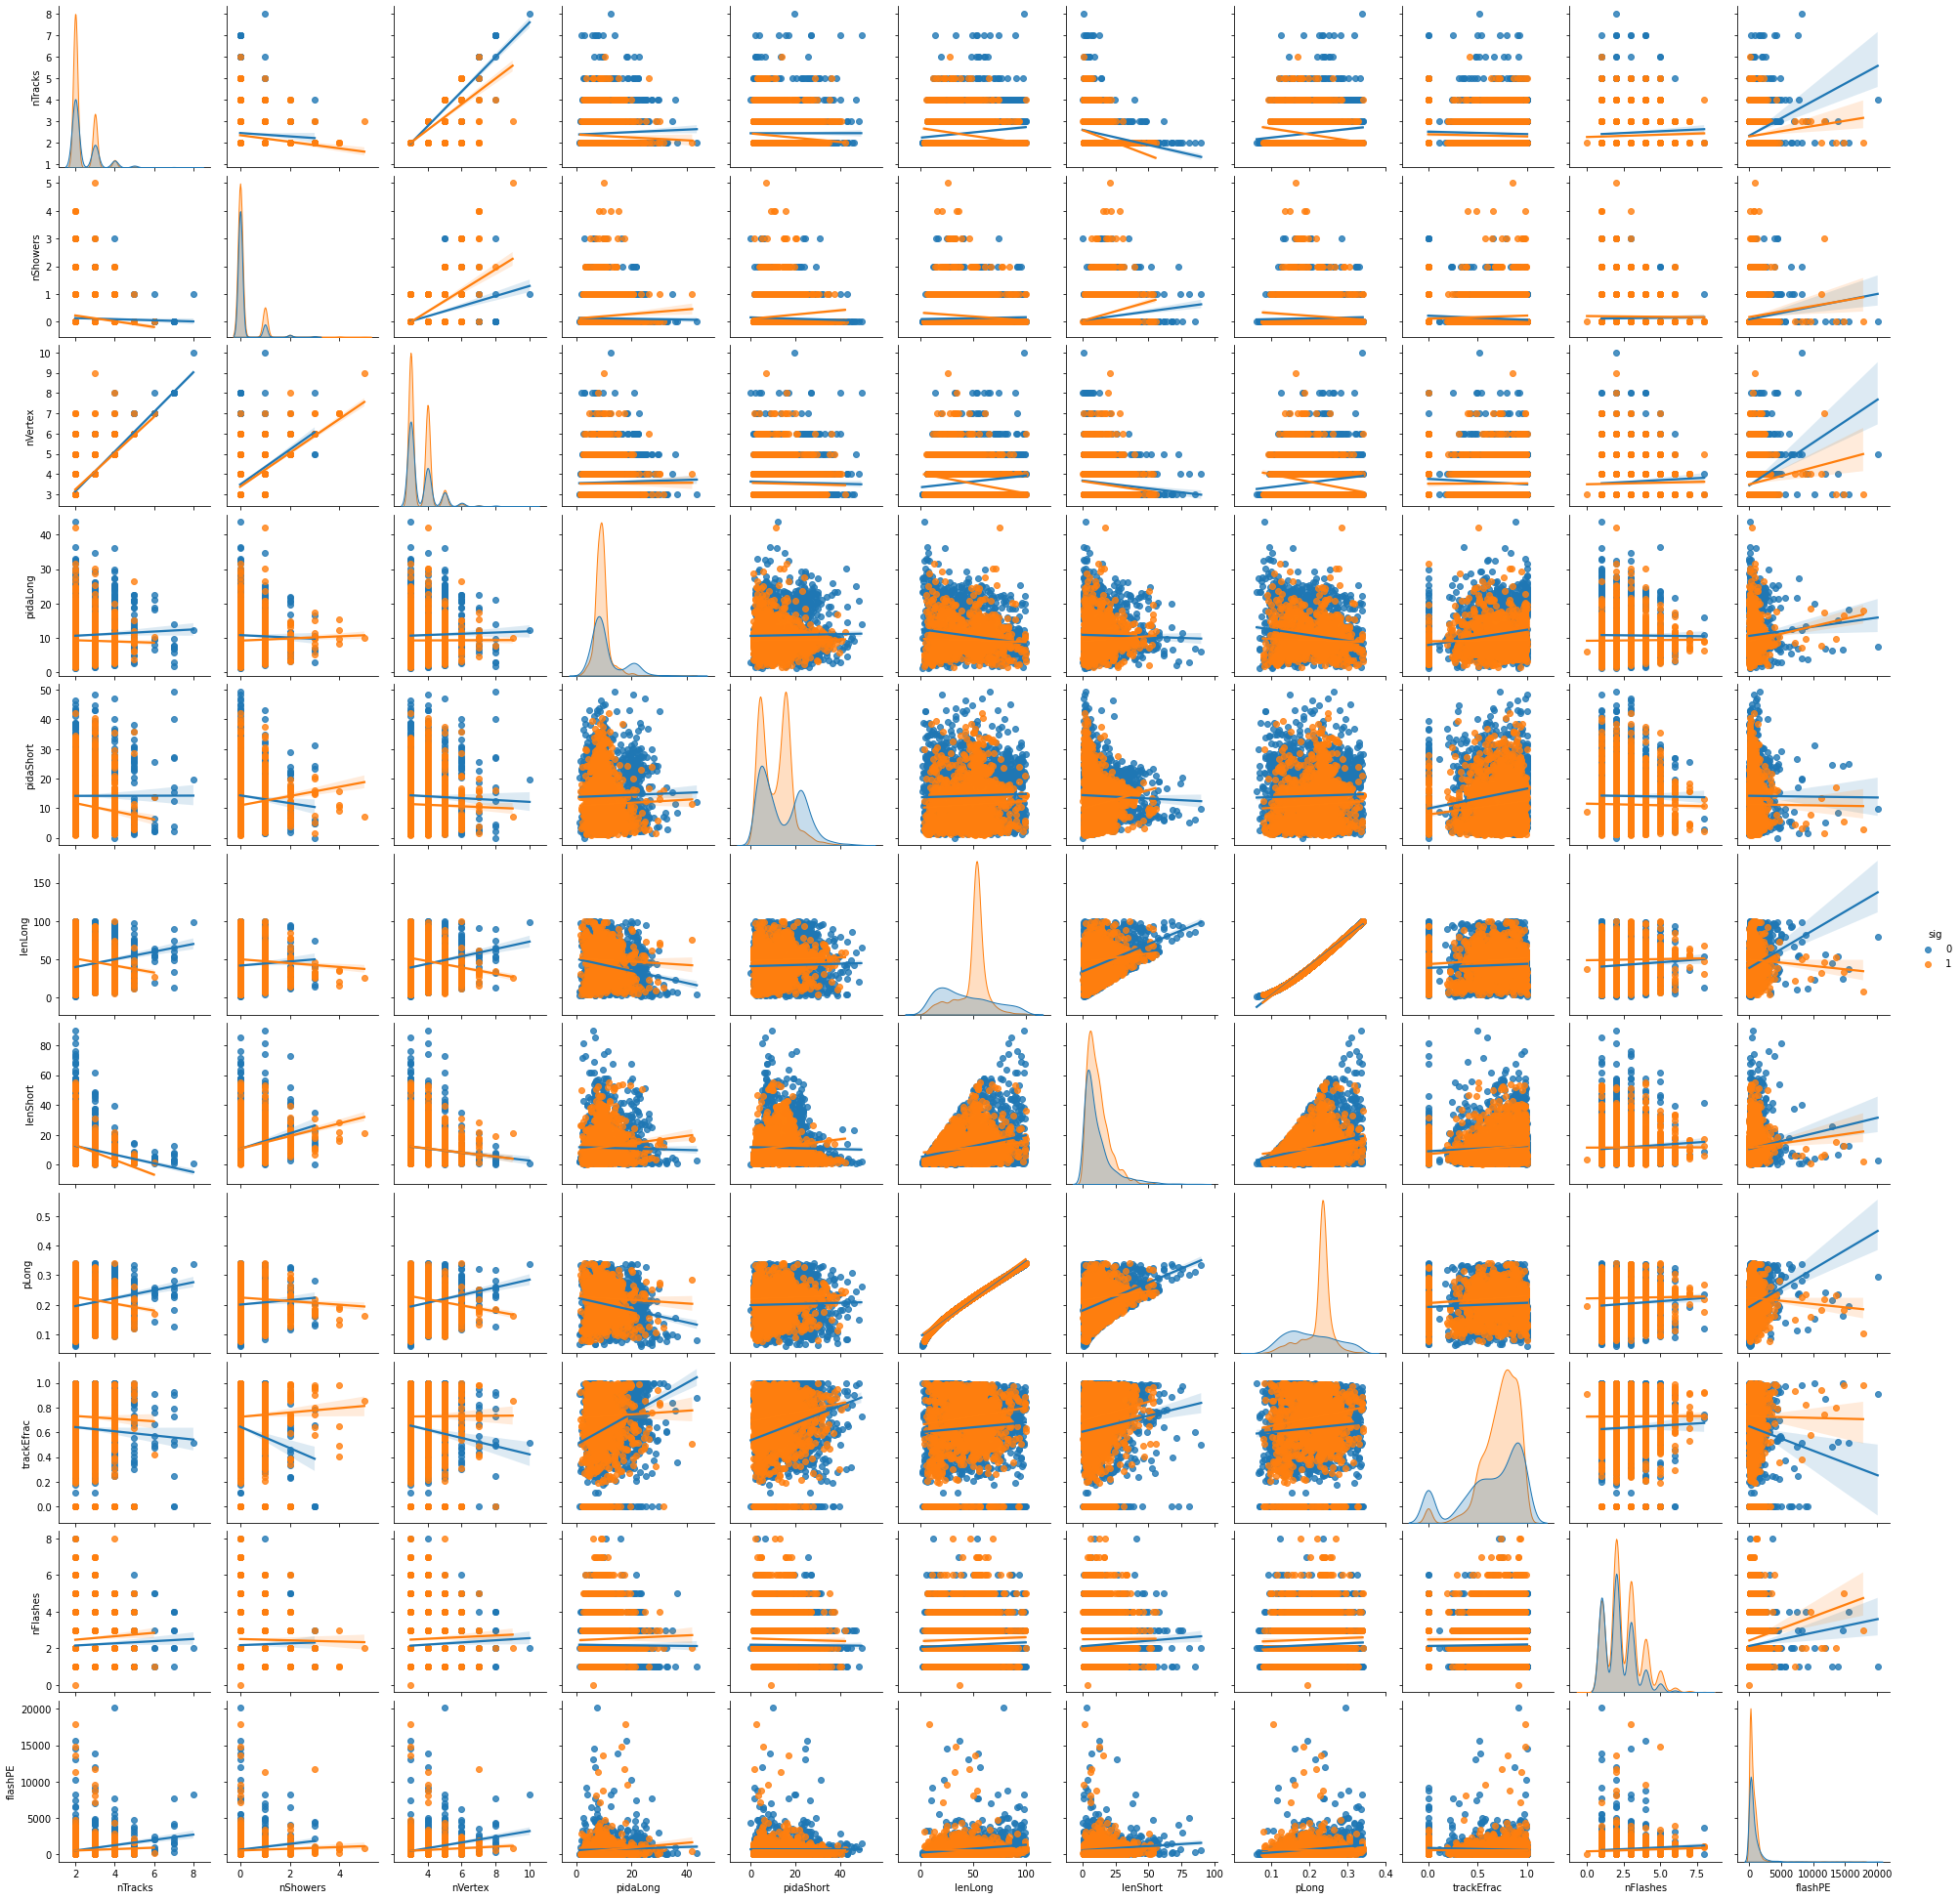

In [7]:
sb.pairplot(data=pdk_df,kind="reg",hue="sig")

In [8]:
pdk_target = pdk_df.sig

### Pull off the "signal" column to use as the target for our ML models

In [9]:
pdk_target
pdk_df=pdk_df.drop(["sig"],axis=1)

### Use 70% of the sample as a training set, and split here. Have a look to make sure it makes sense

In [10]:
X_train, X_test, y_train, y_test =train_test_split(pdk_df, pdk_target, test_size = 0.3)
X_train.head()

,nTracks,nShowers,nVertex,pidaLong,pidaShort,lenLong,lenShort,pLong,trackEfrac,nFlashes,flashPE
3807,2,0,3,7.53794,15.31530,51.95960,23.58640,0.230797,0.609191,2,183.597
483,2,0,3,9.87423,12.99260,77.37160,4.18275,0.289614,0.896771,2,1188.990
750,2,0,3,22.69850,27.17370,8.71138,5.32682,0.105517,0.998606,1,211.244
4007,2,0,3,7.99209,3.12525,49.38020,46.57760,0.224599,0.404219,3,1269.480
2683,2,1,4,9.51655,14.09980,53.80820,31.90330,0.235206,0.774768,1,375.245


In [11]:
y_train.head()

3807    1
483     0
750     0
4007    1
2683    1
Name: sig, dtype: int64

In [12]:
from sklearn import tree
from sklearn import svm

## Here we make our ML models. First a decision tree, we do nothing special to it and let it find its own path

In [13]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

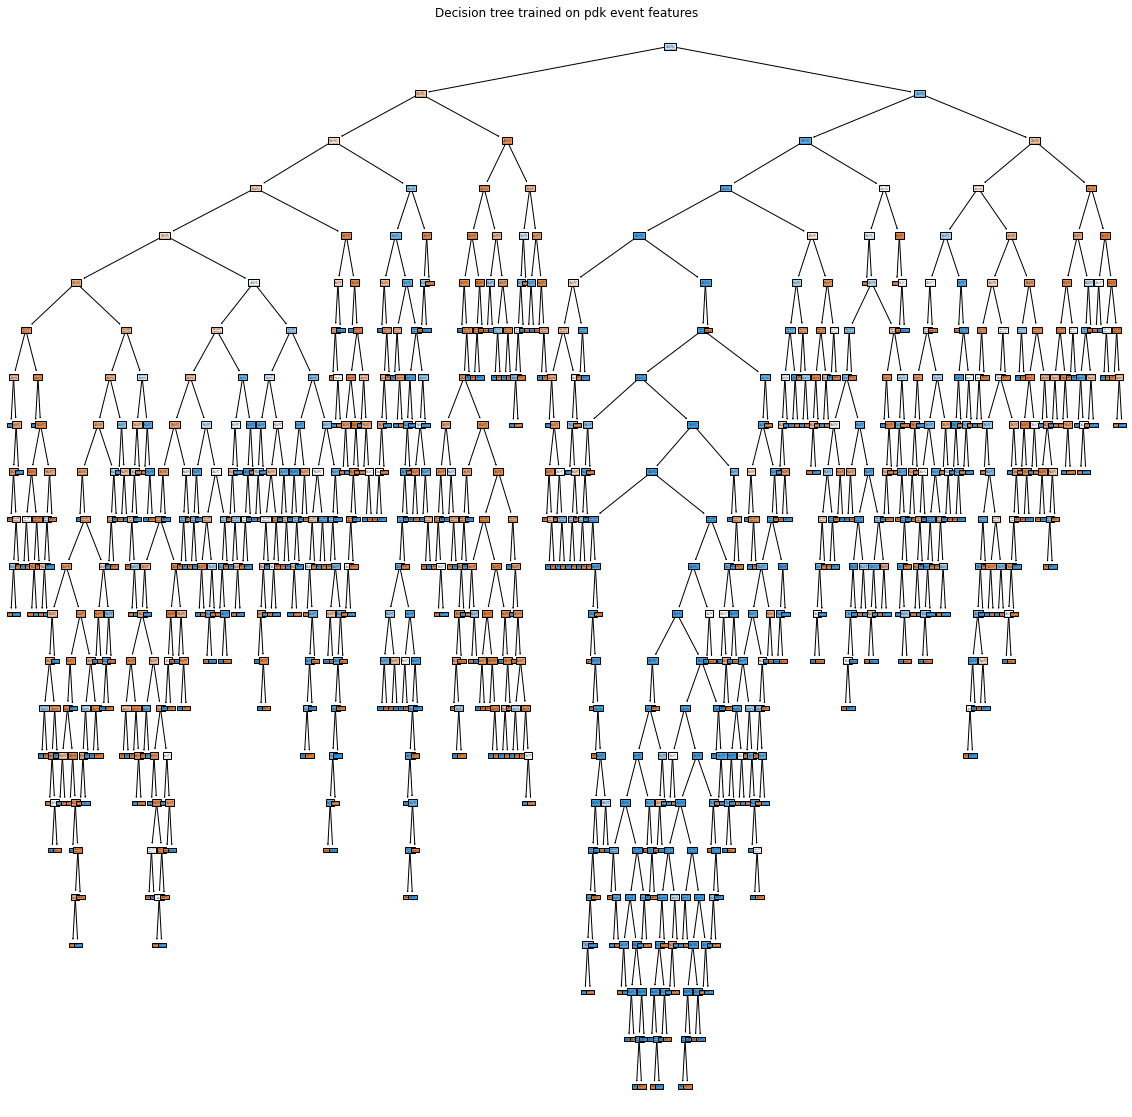

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=[20,20])
plot_tree(clf, filled=True)
plt.title("Decision tree trained on pdk event features")
plt.show()

In [15]:
clf.predict(X_test)

array([1, 0, 1, ..., 0, 1, 0])

In [16]:
clf_score = clf.score(X_test,y_test)
print("The score of the Decision tree classifier is ", clf_score )

The score of the Decision tree classifier is  0.7663782447466008


In [17]:
for i in ["sig","trkE","EmE","visE"]:
    head_list.remove(i)

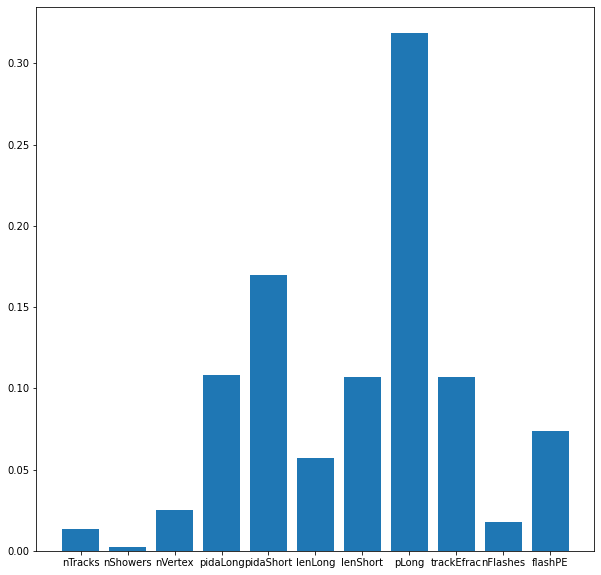

In [18]:
plt.figure(figsize=[10,10])
plt.bar(head_list,clf.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

## Here we try a Gradient Boosting Classifier

In [19]:
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [20]:
gbc = ensemble.GradientBoostingClassifier()

In [21]:
gbc.fit(X_train,y_train)
gbc_preds=gbc.predict(X_test)

In [22]:
gbc_score= gbc.score(X_test,y_test)
print(gbc_score)

0.8244746600741656


It does pretty okay, but can we improve some

In [23]:
classification_report(y_test,gbc_preds)

'              precision    recall  f1-score   support\n\n           0       0.79      0.78      0.78       667\n           1       0.84      0.86      0.85       951\n\n    accuracy                           0.82      1618\n   macro avg       0.82      0.82      0.82      1618\nweighted avg       0.82      0.82      0.82      1618\n'

In [24]:
confusion_matrix(y_test,gbc_preds)

array([[517, 150],
       [134, 817]])

In [25]:
y_scores_gb = gbc.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.91


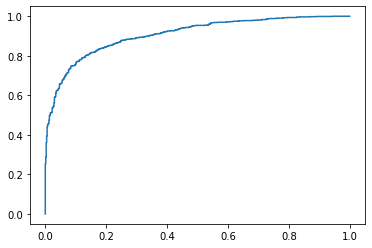

In [26]:
plt.figure()
plt.plot(fpr_gb,tpr_gb)

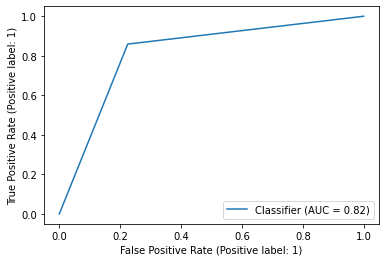

In [27]:
RocCurveDisplay.from_predictions(y_test,gbc_preds)

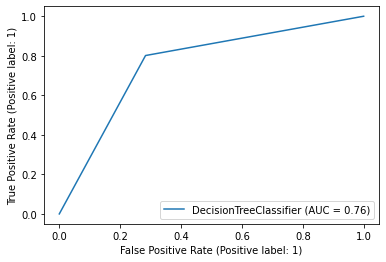

In [28]:
RocCurveDisplay.from_estimator(clf,X_test,y_test)

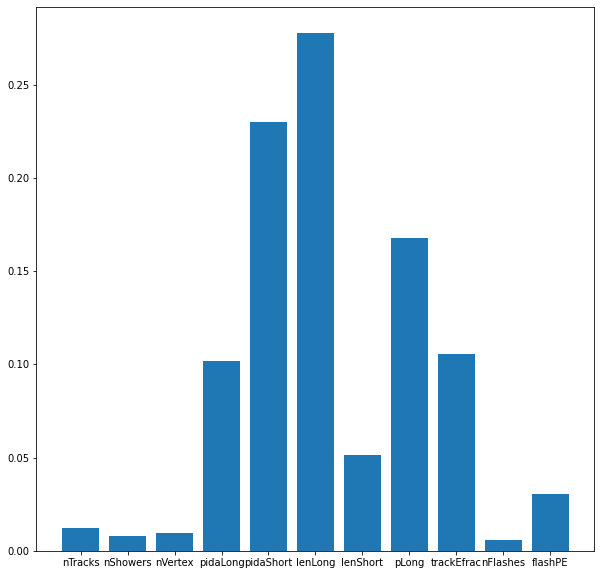

In [29]:
plt.figure(figsize=[10,10])
plt.bar(head_list,gbc.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

In [30]:
gbc500 = ensemble.GradientBoostingClassifier(n_estimators=500)
gbc500.fit(X_train,y_train)
gbc500.score(X_test,y_test)

0.8164400494437577

In [31]:
gbc5 = ensemble.GradientBoostingClassifier(learning_rate=.01,n_estimators=10000)
gbc5.fit(X_train,y_train)
gbc5.score(X_test,y_test)

0.8207663782447466

In [32]:
gbc.feature_importances_

array([0.01208484, 0.00767608, 0.00951725, 0.10189347, 0.2298845 ,
       0.2777787 , 0.0512411 , 0.16805041, 0.10577939, 0.00585937,
       0.03023491])

## What about an SVC? 

In [33]:
svc = svm.NuSVC(gamma="auto")
svc.fit(X_train,y_train)
svc_score=svc.score(X_test,y_test)
print (svc_score)

0.5920889987639061


In [34]:
from sklearn.neural_network import MLPClassifier
nnCLF = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,10, 5,3,2), random_state=3)
nnCLF.fit(X_train,y_train)
nnCLF_score=nnCLF.score(X_test,y_test)

# OKAY, let us do the same thing but for the flash matched set

In [35]:
head_list = ["nTracks","nShowers","nVertex","trkE","EmE","pidaLong","pidaShort","lenLong","lenShort","visE","pLong","trackEfrac","nFlashes","flashPE","sig"]
atmo_flash = pd.read_csv("atmotree_flash.csv",names=head_list,header=None,index_col=False)
pdk_flash = pd.read_csv("pdktree_flash.csv",names=head_list,header=None,index_col=False)

# Signal and background csvs are imported, as well as necessary libraries. Look to see they have expected behavior.

In [36]:
#atmo_flash.head()

In [37]:
#pdk_flash.head()

In [38]:
pdk_fdf = atmo_flash
pdk_fdf=pdk_fdf.append(pdk_flash,ignore_index=True)
pdk_fdf=pdk_fdf.drop(["trkE","EmE","visE"],axis=1)

In [39]:
import seaborn as sb

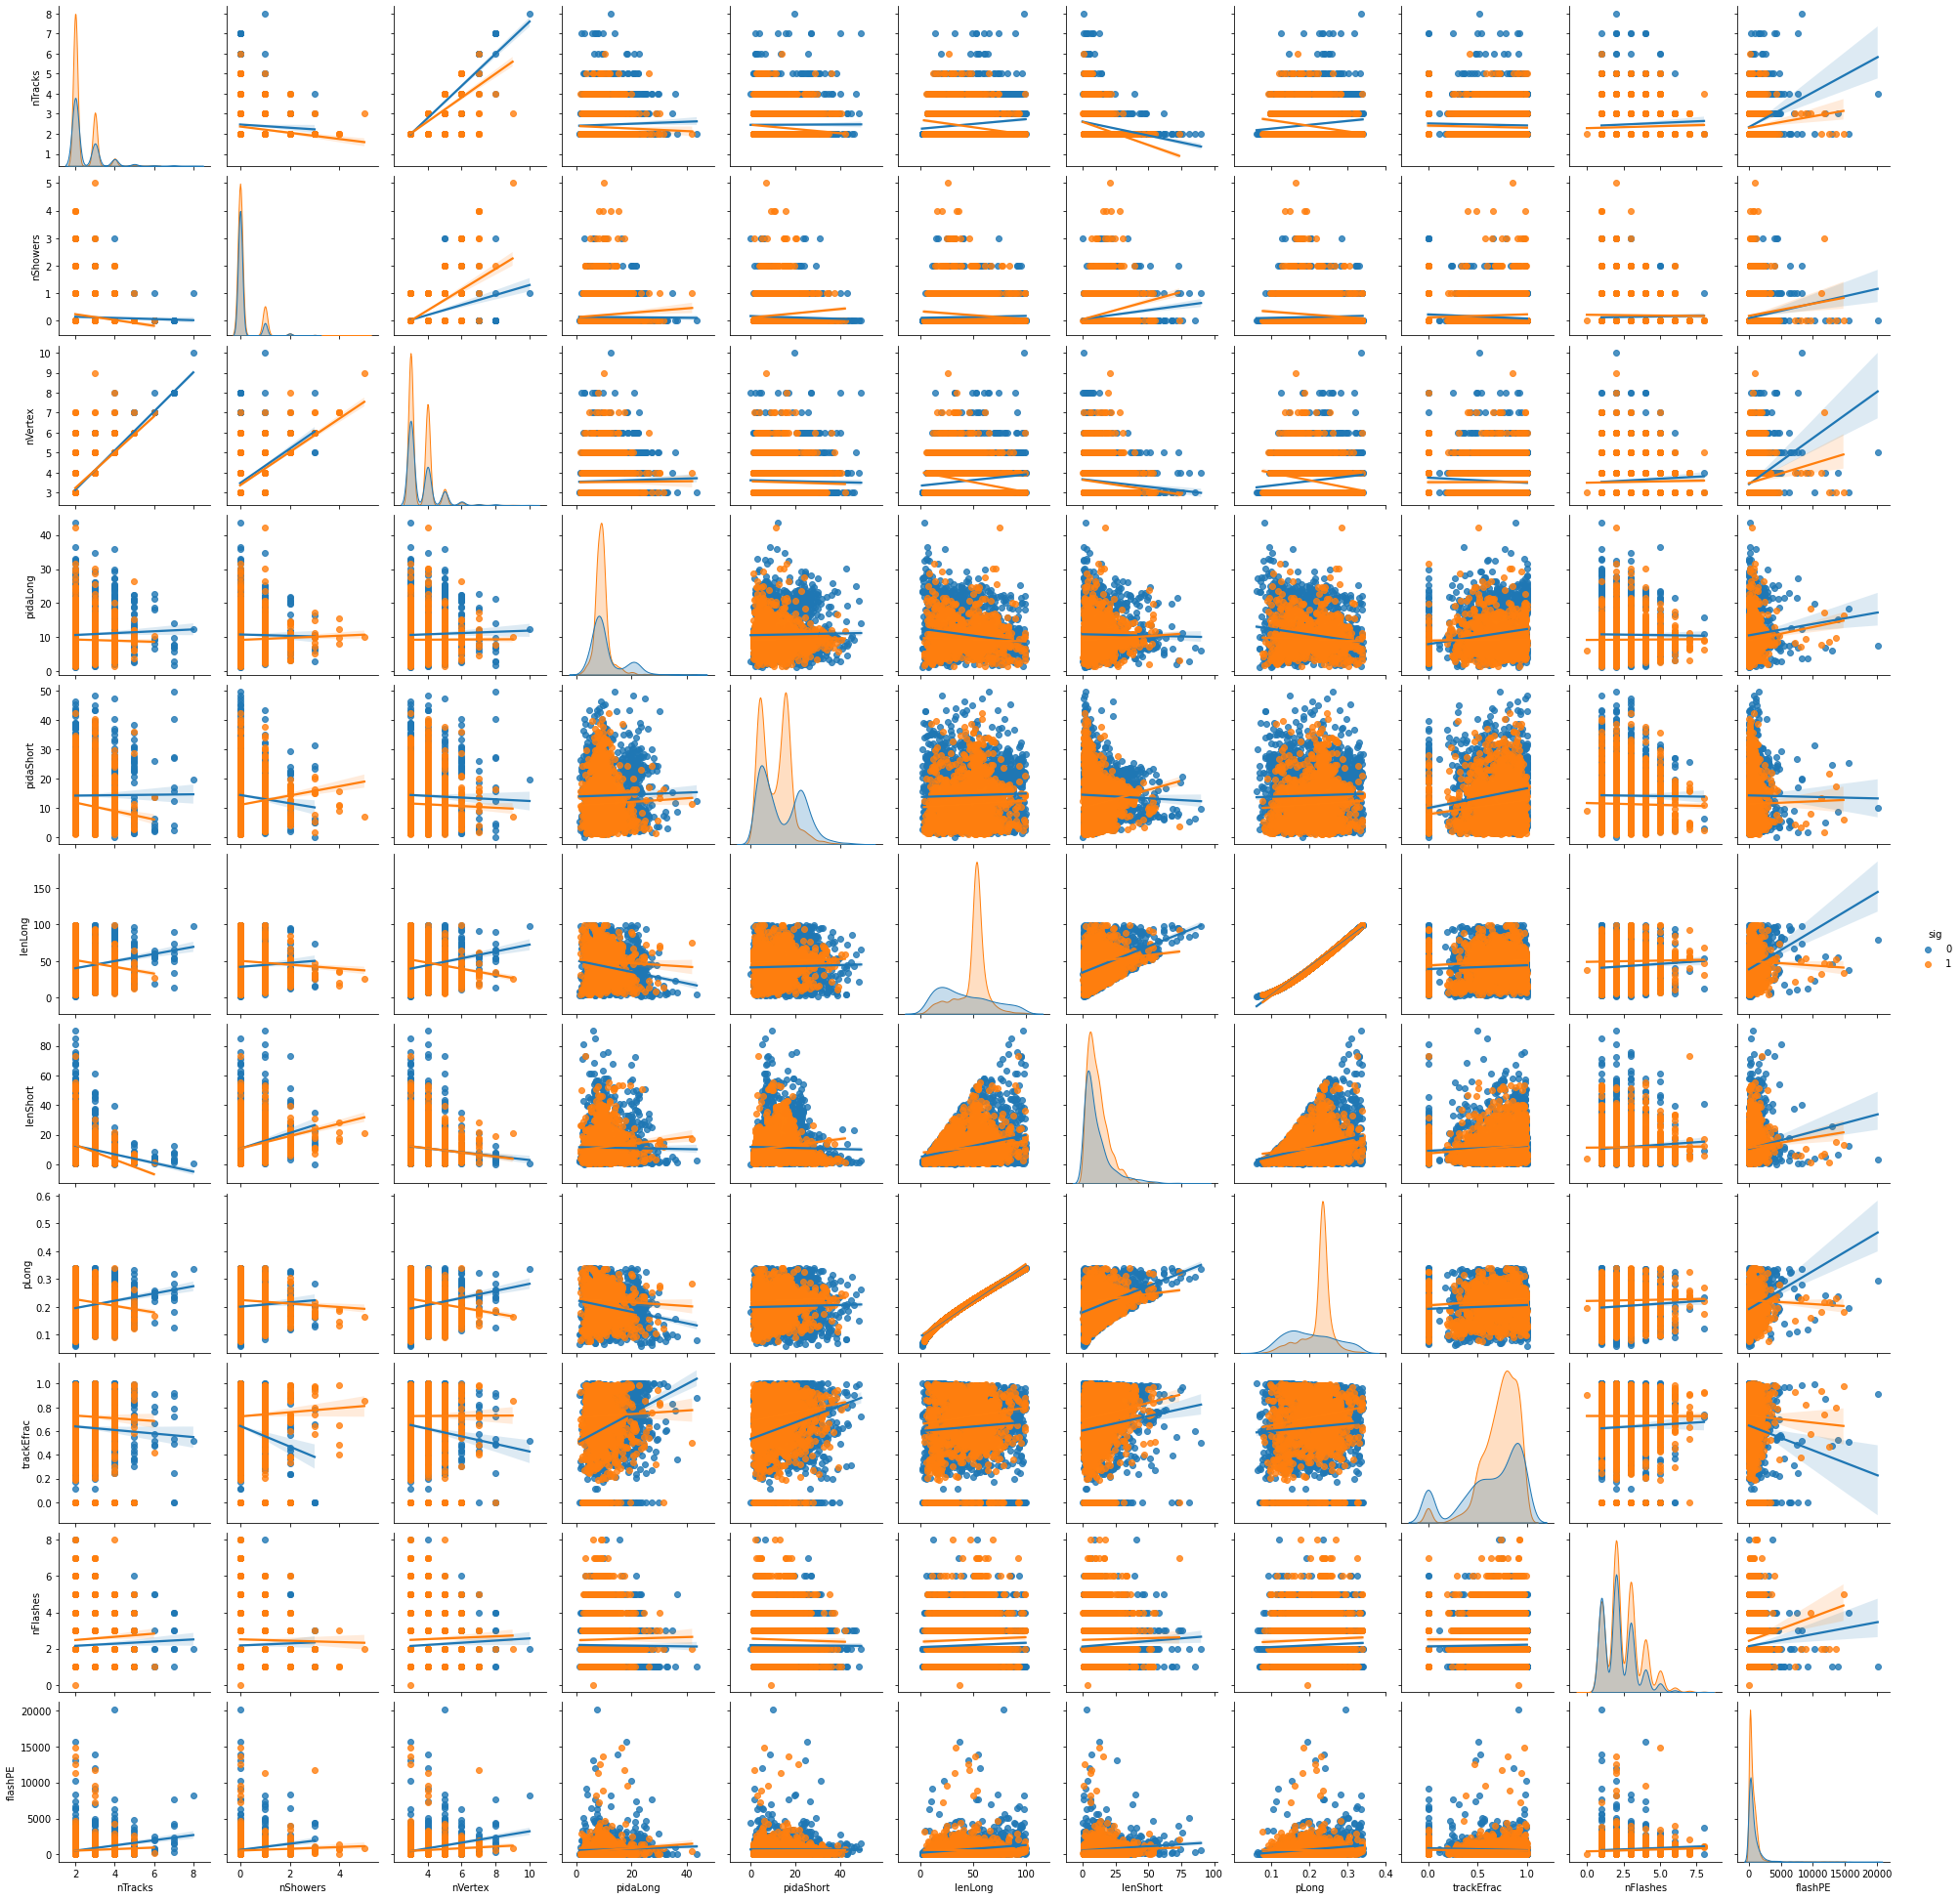

In [40]:
sb.pairplot(data=pdk_fdf,kind="reg",hue="sig")

In [41]:
pdk_ftarget = pdk_fdf.sig

# Pull off the "signal" column to use as the target for our ML models

In [42]:
pdk_ftarget
pdk_fdf=pdk_fdf.drop(["sig"],axis=1)

# Use 70% of the sample as a training set, and split here. Have a look to make sure it makes sense

In [43]:
Xf_train, Xf_test, yf_train, yf_test =train_test_split(pdk_fdf, pdk_ftarget, test_size = 0.3)
Xf_train.head()

,nTracks,nShowers,nVertex,pidaLong,pidaShort,lenLong,lenShort,pLong,trackEfrac,nFlashes,flashPE
939,2,0,3,18.96940,35.68960,11.3179,2.59657,0.116508,0.643559,3,5.81455
3268,2,0,3,9.34601,14.67690,49.5428,15.00060,0.224992,0.481823,2,884.69300
4927,2,0,3,7.11205,3.40545,55.8905,2.55626,0.240141,0.623386,1,327.54900
5134,3,0,4,11.32710,11.79420,56.5064,4.00393,0.241595,0.618394,2,1513.91000
4256,2,0,3,8.54464,4.78879,56.9167,10.09210,0.242562,0.772826,2,571.44300


In [44]:
yf_train.head()

939     0
3268    1
4927    1
5134    1
4256    1
Name: sig, dtype: int64

In [45]:
from sklearn import tree
from sklearn import svm

# Here we make our ML models. First a decision tree, we do nothing special to it and let it find its own path

In [46]:
Fclf=tree.DecisionTreeClassifier()
Fclf.fit(Xf_train,yf_train)

DecisionTreeClassifier()

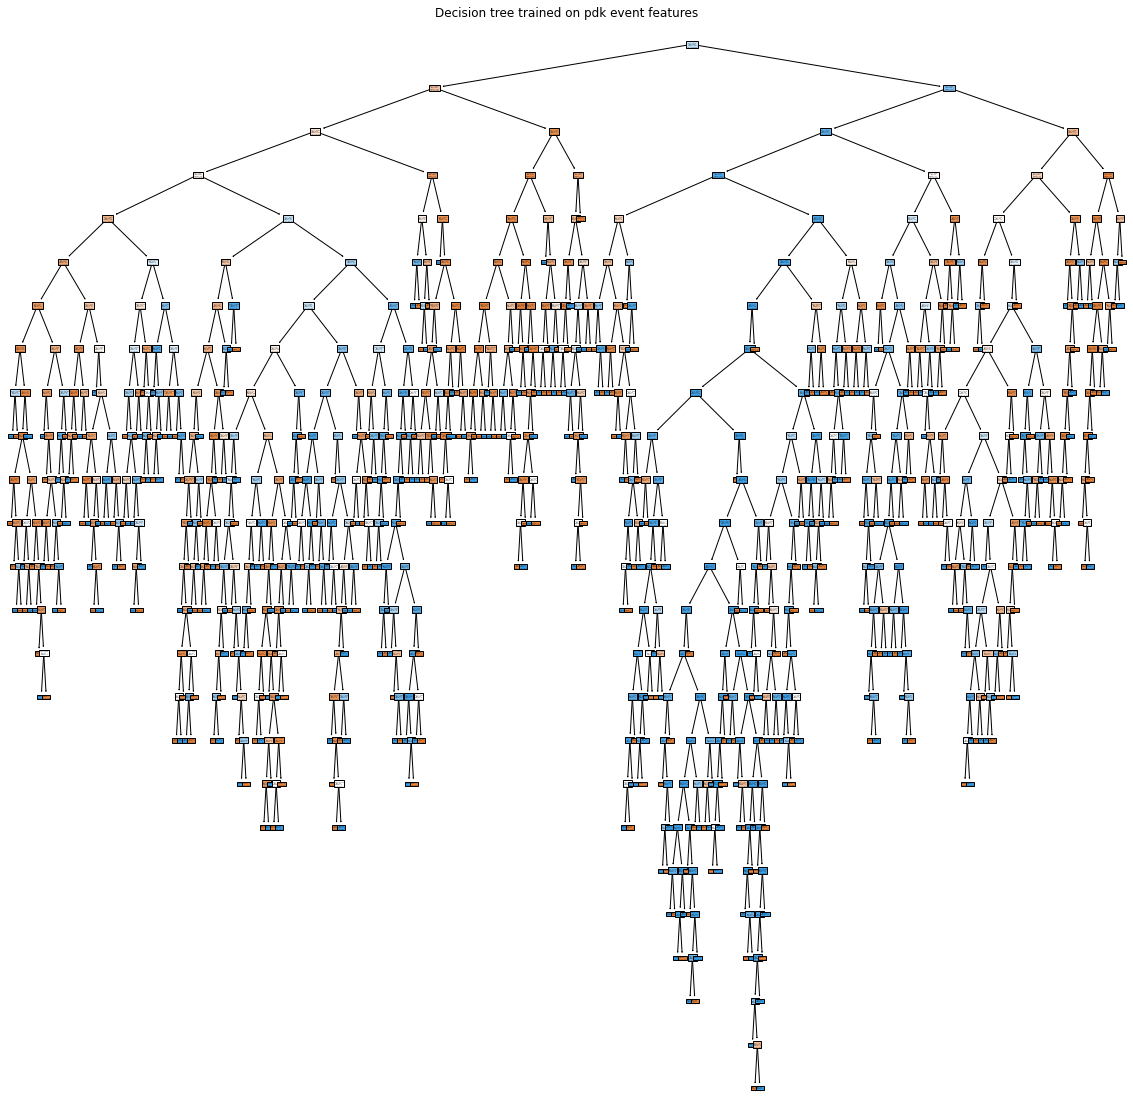

In [47]:
from sklearn.tree import plot_tree
plt.figure(figsize=[20,20])
plot_tree(Fclf, filled=True)
plt.title("Decision tree trained on pdk event features")
plt.show()

In [48]:
Fclf.predict(X_test)

array([1, 1, 1, ..., 0, 1, 1])

In [49]:
Fclf_score= Fclf.score(X_test,y_test)
print("The score of the Decision tree classifier is ", Fclf_score)

The score of the Decision tree classifier is  0.9221260815822002


In [50]:
for i in ["sig","trkE","EmE","visE"]:
    head_list.remove(i)

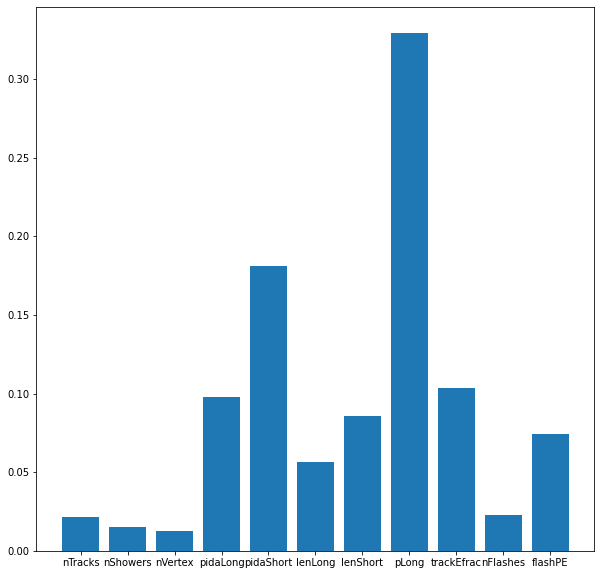

In [51]:
plt.figure(figsize=[10,10])
plt.bar(head_list,Fclf.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

# Here we try a Gradient Boosting Classifier

In [52]:
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

In [53]:
Fgbc = ensemble.GradientBoostingClassifier()

In [54]:
Fgbc.fit(Xf_train,yf_train)
Fgbc_preds=gbc.predict(Xf_test)

In [55]:
Fgbc_score = Fgbc.score(Xf_test,yf_test)
print(Fgbc_score)

0.8493827160493828


It does pretty okay, but can we improve some

In [56]:
classification_report(yf_test,Fgbc_preds)

'              precision    recall  f1-score   support\n\n           0       0.86      0.83      0.85       680\n           1       0.88      0.90      0.89       940\n\n    accuracy                           0.87      1620\n   macro avg       0.87      0.87      0.87      1620\nweighted avg       0.87      0.87      0.87      1620\n'

In [57]:
confusion_matrix(yf_test,Fgbc_preds)

array([[565, 115],
       [ 92, 848]])

In [58]:
yf_scores_gb = Fgbc.decision_function(Xf_test)
ffpr_gb, ftpr_gb, _ = roc_curve(yf_test, yf_scores_gb)
froc_auc_gb = auc(ffpr_gb, ftpr_gb)

print("Area under ROC curve = {:0.2f}".format(froc_auc_gb))

Area under ROC curve = 0.91


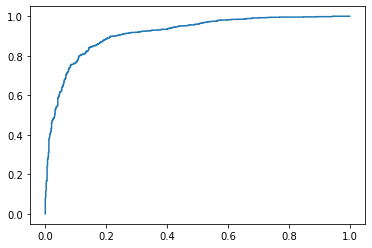

In [59]:
plt.figure()
plt.plot(ffpr_gb,ftpr_gb)

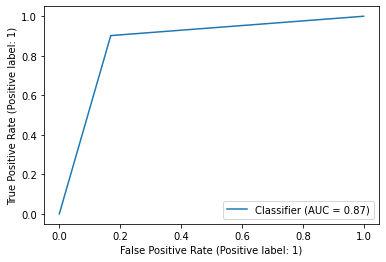

In [60]:
RocCurveDisplay.from_predictions(yf_test,Fgbc_preds)

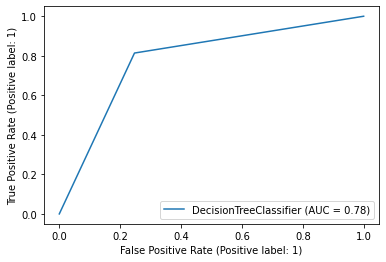

In [61]:
RocCurveDisplay.from_estimator(Fclf,Xf_test,yf_test)

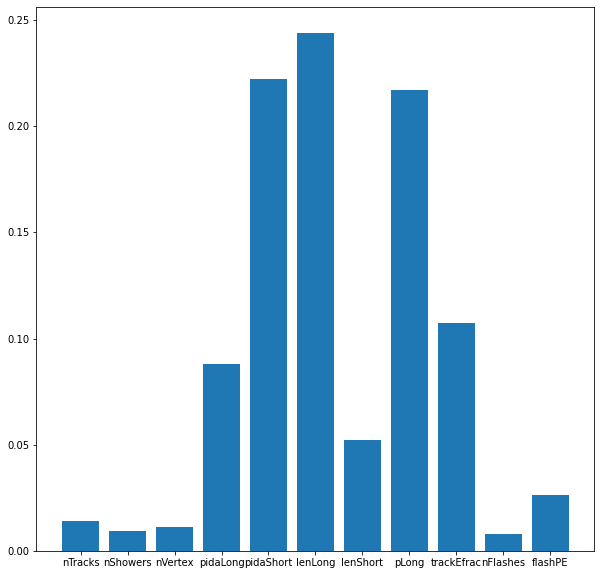

In [62]:
plt.figure(figsize=[10,10])
plt.bar(head_list,Fgbc.feature_importances_)
plt.xlabel="Feature"
plt.ylabel="Importance"
plt.show()

In [63]:
Fgbc500 = ensemble.GradientBoostingClassifier(n_estimators=500)
Fgbc500.fit(Xf_train,yf_train)
Fgbc500.score(Xf_test,yf_test)

0.8432098765432099

In [64]:
Fgbc5 = ensemble.GradientBoostingClassifier(learning_rate=.01,n_estimators=10000)
Fgbc5.fit(Xf_train,yf_train)
Fgbc5.score(Xf_test,yf_test)

0.8401234567901235

In [65]:
Fgbc.feature_importances_

array([0.0142287 , 0.0091214 , 0.01105191, 0.08800812, 0.2224243 ,
       0.24393824, 0.05228529, 0.2172182 , 0.10738916, 0.00797147,
       0.02636321])

# What about an SVC? 

In [66]:
Fsvc = svm.NuSVC(gamma="auto")
Fsvc.fit(Xf_train,yf_train)
Fsvc_score = Fsvc.score(Xf_test,yf_test)

In [67]:
from sklearn.neural_network import MLPClassifier
FnnCLF = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,10, 5,3,2), random_state=3)
FnnCLF.fit(Xf_train,yf_train)
FnnCLF_score = FnnCLF.score(Xf_test,yf_test)

/Users/kylespurgeon/Library/Python/3.7/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# How do the scores match up?

In [68]:
scores_df_dict = {"Classifier":["DecTree","GBC","SVC","NN"],
                  "Prod":[clf_score,gbc_score,svc_score,nnCLF_score],
                  "Flash Matched":[Fclf_score,Fgbc_score,Fsvc_score,FnnCLF_score]}
scores_df=pd.DataFrame(scores_df_dict)
scores_df=scores_df.set_index("Classifier")

<AxesSubplot:xlabel='Classifier', ylabel='Score'>

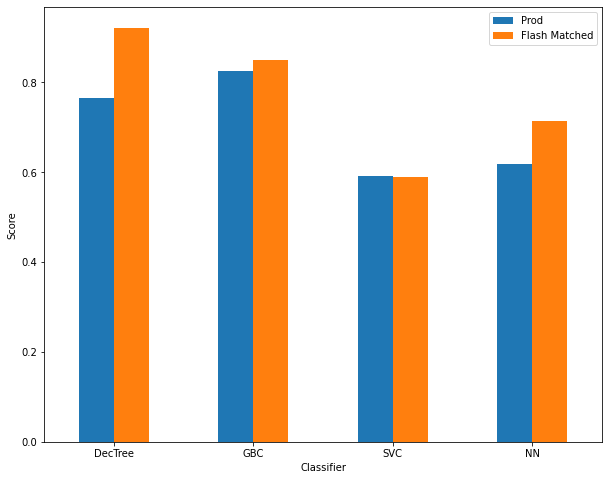

In [69]:
scores_df.plot(kind="bar",figsize=[10,8],ylabel="Score",rot=0)

Text(-0.012902481438248114, flashPE, 'Flash Matched')

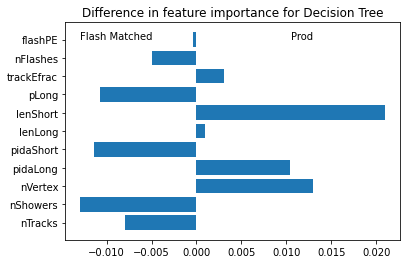

In [217]:
import_diff = clf.feature_importances_ - Fclf.feature_importances_
Flabel_x = import_diff.min()
label_x = (import_diff.max()+import_diff.mean())/2
plt.figure()
plt.barh(head_list,width=import_diff,)
plt.title("Difference in feature importance for Decision Tree")
plt.annotate("Prod",xy=[label_x,"flashPE"])
plt.annotate("Flash Matched",xy=[Flabel_x,"flashPE"])

Text(-0.024583899088078884, flashPE, 'Flash Matched')

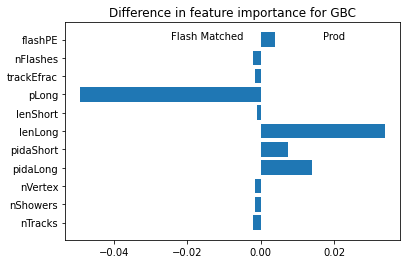

In [218]:
import_diff = gbc.feature_importances_ - Fgbc.feature_importances_
Flabel_x = (import_diff.mean()+import_diff.min())/2
label_x = (import_diff.max()+import_diff.mean())/2
plt.figure()
plt.barh(head_list,width=import_diff,)
plt.title("Difference in feature importance for GBC")
plt.annotate("Prod",xy=[label_x,"flashPE"])
plt.annotate("Flash Matched",xy=[Flabel_x,"flashPE"])

# It seems the importance of the enery (momentum) increases when better t0 matching (flash matching) is implemented?

Text(-6, 200, 'Kolmogorov-Smirnov test:\n sig(bkg) probability: 0.083 (5e-05)')

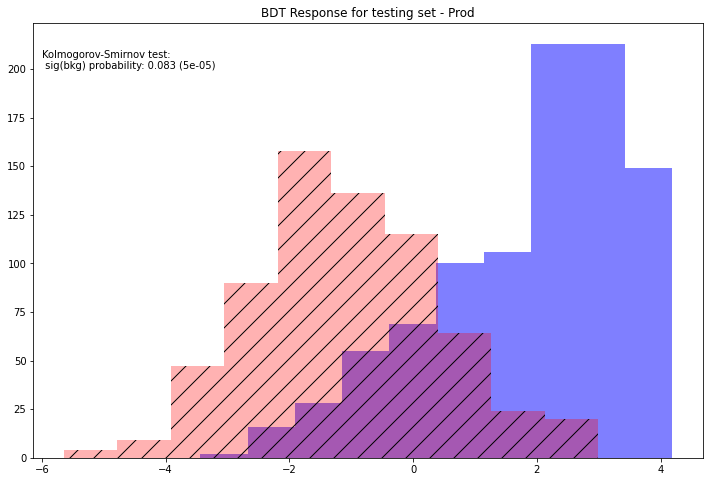

In [205]:
from scipy.stats import ks_2samp
plt.figure(figsize=[12,8])
plotset = X_test.join(y_test)

plotset_sig = plotset[plotset.sig==1].drop('sig',axis=1)
plotset_bckgd = plotset[plotset.sig==0].drop('sig',axis=1)
plt.hist(gbc.decision_function(plotset_sig),color='blue',histtype='bar',alpha=.5)
plt.hist(gbc.decision_function(plotset_bckgd),color='red',histtype='bar',alpha=.3,hatch='/')
plt.title("BDT Response for testing set - Prod")

trainset = X_train.join(y_train)

trainset_sig = trainset[trainset.sig==1].drop('sig',axis=1)
trainset_bckgd = trainset[trainset.sig==0].drop('sig',axis=1)

sig_kstat, sig_kp = ks_2samp(gbc.decision_function(trainset_sig),gbc.decision_function(plotset_sig))
bkg_kstat, bkg_kp = ks_2samp(gbc.decision_function(trainset_bckgd),gbc.decision_function(plotset_bckgd))
plt.annotate(("Kolmogorov-Smirnov test:\n sig(bkg) probability: "+str(round(sig_kp,3))+" ("+str(round(bkg_kp,5))+")"),xy=[-6,200])

Text(-5, 250, 'Kolmogorov-Smirnov test:\n sig(bkg) probability: 0.371 (0.219)')

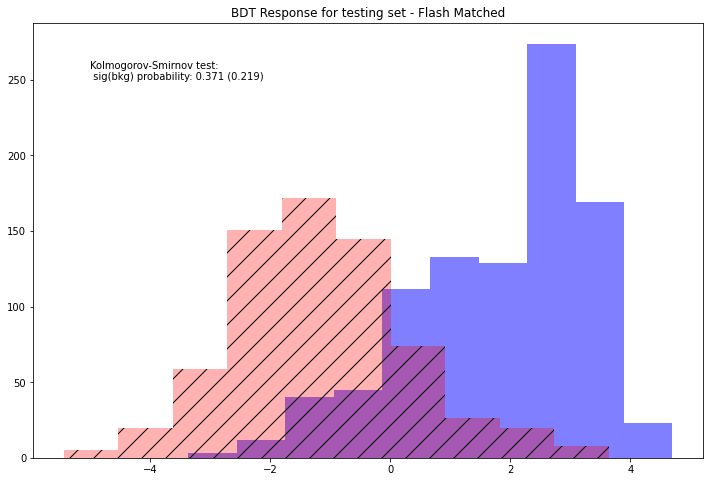

In [206]:
fplotset = Xf_test.join(yf_test)
plt.figure(figsize=[12,8])

fplotset_sig = fplotset[fplotset.sig==1].drop('sig',axis=1)
fplotset_bckgd = fplotset[fplotset.sig==0].drop('sig',axis=1)
plt.hist(Fgbc.decision_function(fplotset_sig),color='blue',histtype='bar',alpha=.5)
plt.hist(Fgbc.decision_function(fplotset_bckgd),color='red',histtype='bar',alpha=.3,hatch='/')
plt.title("BDT Response for testing set - Flash Matched")

ftrainset = Xf_train.join(yf_train)

ftrainset_sig = ftrainset[ftrainset.sig==1].drop('sig',axis=1)
ftrainset_bckgd = ftrainset[ftrainset.sig==0].drop('sig',axis=1)

fsig_kstat, fsig_kp = ks_2samp(Fgbc.decision_function(ftrainset_sig),Fgbc.decision_function(fplotset_sig))
fbkg_kstat, fbkg_kp = ks_2samp(Fgbc.decision_function(ftrainset_bckgd),Fgbc.decision_function(fplotset_bckgd))
plt.annotate(("Kolmogorov-Smirnov test:\n sig(bkg) probability: "+str(round(fsig_kp,3))+" ("+str(round(fbkg_kp,5))+")"),xy=[-5,250])